_____________________________________
#      First Population
-> Use First Fit heuristic with the objects in a random order

_______________________________________________________________
#      Crossover (BPCX)

ABCDEF(first parent) x abcd(second parent)

1. made copies from both

2. split in three pieces

   A | BCD | EF  
   ab | cd | 

3. merge them in arbitrary form
   AcdBCDEF


_______________________________________________________________
#      Mutation

-> Select some bins and erase them

[chromossome-K]
    (gene 0)  A = [1, 5, 3]
    (gene 1)  B = [2, 4]            (erase bin B)
    (gene 2)  C = [6, 7, 8]
    (gene 3)  D = [9, 10]           (erase bin D)


-> reinsert items 2, 4, 9, 10 Do First Fit Decreasing

Two Rules:
Among deleted bins:
-> One is the emptiest
-> Always eliminated at least 3 bins

_______________________________________________________________
#      Inversion

-> swap two random bins in a random chromossome

Ex: "should B and D be promising genes (i.e. well filled bins), the
probability of transmitting both of them during the next
crossover is improved after the inversion, since they are
now closer together, i.e. safer against disruption."

In [554]:
import random
import math
import matplotlib.pyplot as plt

In [555]:
# Solution
# 120_08 => 50
# 120_09 => 46
# 120_10 => 52
# 120_11 => 49
# 250_04 => 101
# 250_05 => 101
# 250_06 => 102
# 250_07 => 103
# 250_08 => 105
# 500_03 => 204
# 500_04 => 206
# 500_05 => 206
# 1000_00 => 399
# 1000_01 => 406
# 1000_02 => 411

In [556]:
#_________________250___________________________________________________________________________________________________________________
# ------------ test case: 04   
# n = 250
# capacidade_bin = 150
# pesos_objetos = [100,100,99,98,98,98,97,97,97,96,95,95,94,94,94,93,92,92,92,92,92,92,92,91,91,91,91,91,90,90,90,90,90,90,89,89,89,89,88,88,88,88,88,87,87,86,86,86,85,85,84,83,83,83,82,82,82,82,82,81,81,81,80,80,79,79,79,77,77,76,76,76,76,76,75,75,75,75,74,74,74,74,74,74,74,73,73,72,72,72,70,70,69,69,69,69,68,68,67,67,67,66,66,66,66,66,66,65,65,65,65,65,64,64,64,63,62,62,62,62,62,62,61,61,60,60,60,60,59,59,59,59,59,58,58,58,58,58,57,57,57,57,57,56,55,55,54,54,54,54,54,52,52,52,52,52,52,52,51,51,51,50,50,50,49,49,49,48,48,46,46,46,46,45,45,45,45,45,45,44,44,44,43,43,42,42,41,40,40,40,40,40,40,40,39,39,39,39,39,38,38,38,37,37,37,37,36,36,35,34,34,34,34,33,33,33,33,32,32,31,31,30,30,29,29,29,28,28,27,27,26,26,26,25,23,23,22,22,22,22,21,21,21,21,21,20,20,20,20,20 ]
# ------------ test case: 05
# n = 250
# capacidade_bin = 150
# pesos_objetos = [100,100,99,99,99,99,99,99,98,98,98,98,98,97,97,97,97,97,96,95,94,94,93,93,92,91,91,91,91,91,91,90,90,90,90,89,89,89,88,88,87,87,87,86,86,85,84,84,84,84,83,83,83,82,82,82,81,81,81,80,80,80,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,76,76,75,75,73,72,72,71,71,70,69,69,69,69,68,67,67,67,66,66,66,66,66,65,65,65,64,64,64,64,63,63,63,63,63,62,62,62,61,61,61,60,60,60,59,59,59,59,58,58,58,57,57,57,57,57,56,56,56,56,55,55,54,54,54,54,54,54,52,52,52,52,52,52,52,51,51,51,50,50,50,50,49,49,49,48,48,47,46,45,45,45,45,45,44,43,43,42,42,41,41,41,41,40,40,39,38,38,38,38,38,37,37,37,37,37,36,36,36,36,35,35,35,35,35,35,35,34,33,33,32,32,31,30,30,30,30,29,29,28,28,28,28,28,27,27,27,27,26,26,26,26,26,24,24,24,23,23,23,23,22,22,22,21,21,21,20 ]
# ------------ test case: 06
# n = 250
# capacidade_bin = 150
# pesos_objetos = [100,100,100,100,99,99,99,98,98,97,97,97,96,96,96,96,95,95,95,95,93,93,93,92,92,91,91,91,91,91,90,90,90,90,90,89,88,88,88,87,87,86,86,85,84,84,84,84,84,84,84,84,83,82,82,82,82,81,81,81,81,81,81,80,79,79,78,78,78,78,78,77,77,77,76,76,76,76,76,74,74,74,74,74,74,74,73,73,73,73,72,72,72,72,71,71,71,71,71,70,69,69,69,69,68,68,68,66,66,66,66,66,66,65,65,65,64,64,63,63,63,62,62,62,61,61,61,61,61,60,60,60,59,59,59,58,57,57,56,56,56,55,55,55,55,54,54,54,53,53,53,53,52,52,52,51,51,51,51,51,50,50,50,50,49,49,48,48,47,47,47,47,46,46,45,45,45,45,44,44,44,43,43,42,42,42,41,41,41,40,40,40,39,39,39,39,39,38,38,38,38,37,36,35,35,34,34,33,33,33,33,32,32,32,32,31,31,31,30,30,29,29,29,28,28,28,28,27,27,27,26,26,25,25,24,24,23,22,22,22,22,22,22,22,22,21,20,20,20,20 ]
# ------------ test case: 07
# n = 250
# capacidade_bin = 150
# pesos_objetos = [100,100,100,100,100,100,99,99,99,99,99,99,99,99,98,98,98,97,97,97,96,96,96,95,94,94,94,93,93,93,93,93,93,92,91,91,91,90,90,90,90,90,89,89,89,89,89,88,88,88,87,87,86,86,86,85,85,85,84,84,84,84,83,83,83,83,82,82,82,81,81,80,80,80,78,78,78,78,78,77,77,76,76,76,76,75,75,75,75,74,74,74,73,73,73,73,72,71,71,71,71,70,70,69,69,69,69,68,68,68,67,65,65,64,64,64,64,64,64,64,63,63,63,63,62,61,61,61,61,61,61,61,61,60,60,59,59,58,58,58,58,57,56,56,56,55,55,55,54,54,54,54,53,53,52,51,50,49,49,49,48,48,48,47,47,47,46,46,46,46,45,45,45,44,44,44,44,44,43,43,43,42,42,42,41,41,41,41,40,40,39,39,39,38,38,38,38,38,37,37,36,36,36,36,35,35,35,34,34,34,34,33,33,32,32,31,31,31,31,30,30,30,30,30,28,28,28,28,27,27,27,27,25,25,24,24,24,24,24,23,23,23,23,23,22,22,21,21,20,20 ]
# ------------ test case: 08
# n = 250
capacidade_bin = 150
pesos_objetos = [100,100,100,100,100,99,98,98,98,97,97,95,95,95,95,95,95,94,94,94,94,93,92,92,92,92,92,91,91,90,90,90,89,89,89,89,89,88,88,87,87,87,86,86,86,86,86,85,85,85,85,85,84,84,83,83,82,82,81,81,80,80,80,80,79,79,79,79,79,79,79,78,77,77,77,76,76,76,76,75,75,75,75,74,74,74,73,73,73,73,73,73,73,72,72,72,72,72,72,72,72,71,71,70,70,70,70,69,69,68,68,68,68,68,67,67,66,66,66,65,65,65,64,64,64,64,63,63,63,63,62,62,62,62,62,61,61,61,60,60,59,59,59,58,58,58,58,57,56,56,56,56,56,55,55,55,55,55,54,54,54,53,53,53,53,53,52,51,51,51,51,51,51,51,51,50,50,50,50,49,49,49,48,48,47,47,47,47,46,46,45,45,45,44,44,44,44,43,43,42,42,42,41,40,40,40,40,40,39,38,38,37,37,37,36,36,36,35,35,34,34,34,34,33,33,32,31,30,30,30,30,30,29,28,28,27,27,27,26,26,26,24,23,23,22,22,22,22,22,21 ]

In [557]:
#____________1000_______________________________________________________________________________________________________________________
# ------------ test case: 00
# n = 1000
# capacidade_bin = 150
# pesos_objetos = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,72,72,72,72,72,72,72,72,72,72,72,71,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,61,61,61,61,61,61,61,61,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,59,59,59,59,59,59,59,59,59,58,58,58,58,58,58,58,58,58,58,58,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,54,54,54,54,54,54,54,54,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,52,52,52,52,52,52,52,52,52,51,51,51,51,51,51,51,50,50,50,50,50,50,50,50,50,50,50,50,49,49,49,49,49,49,49,49,49,49,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,47,47,47,47,47,47,47,47,47,47,47,47,47,46,46,46,46,46,46,46,46,46,46,46,46,46,46,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,44,44,44,44,44,44,44,44,44,44,44,44,44,44,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,41,41,41,41,41,41,41,41,41,41,41,41,40,40,40,40,40,40,40,40,40,40,40,39,39,39,39,39,39,39,39,39,39,38,38,38,38,38,38,38,38,38,38,38,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,36,36,36,36,36,36,36,36,36,36,36,36,36,35,35,35,35,35,35,35,35,35,35,35,35,34,34,34,34,34,34,34,34,34,34,34,34,34,33,33,33,33,33,33,33,33,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,31,31,31,31,31,31,31,31,31,30,30,30,30,30,30,30,30,30,30,30,29,29,29,29,29,29,29,29,29,29,29,29,28,28,28,28,28,28,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,26,26,26,26,26,26,26,26,26,26,26,25,25,25,25,25,25,25,25,25,25,25,25,24,24,24,24,24,24,24,24,24,24,24,24,23,23,23,23,23,23,23,23,23,23,23,23,23,22,22,22,22,22,22,22,22,21,21,21,21,21,21,21,21,21,21,21,21,20,20,20,20,20,20,20,20,20,20,20,20,20,20 ]
# ------------ test case: 01
# n = 1000
# capacidade_bin = 150
# pesos_objetos = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,85,85,85,85,85,85,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,72,72,72,72,72,72,72,72,72,72,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,60,60,60,60,60,60,60,60,60,60,60,59,59,59,59,59,59,59,59,59,59,59,59,59,59,58,58,58,58,58,58,58,58,58,58,58,58,58,57,57,57,57,57,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,56,56,55,55,55,55,55,55,55,55,55,55,55,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,53,53,53,53,53,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,51,51,51,51,51,51,51,51,51,51,51,51,50,50,50,50,50,50,50,50,50,50,50,50,49,49,49,49,49,49,49,49,49,49,49,48,48,48,48,48,48,48,48,48,47,47,47,47,47,47,47,47,46,46,46,46,46,46,46,46,46,46,46,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,44,44,44,44,44,44,44,44,44,44,44,44,43,43,43,43,43,43,43,43,43,42,42,42,42,42,42,42,42,42,42,41,41,41,41,41,41,41,41,41,41,41,41,40,40,40,40,40,40,40,40,40,40,40,40,40,40,39,39,39,39,39,39,39,39,39,39,39,39,39,39,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,37,37,37,37,37,37,37,37,37,37,37,37,36,36,36,36,36,36,36,36,36,36,36,35,35,35,35,35,35,35,35,35,35,35,35,35,34,34,34,34,34,34,34,34,34,34,34,33,33,33,33,33,33,33,33,33,33,33,33,32,32,32,32,32,32,32,32,32,32,31,31,31,31,31,31,31,31,31,31,30,30,30,30,30,30,30,30,30,30,30,30,30,29,29,29,29,29,29,29,29,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,27,27,27,27,27,27,27,27,27,27,27,27,27,26,26,26,26,26,26,26,26,26,26,25,25,25,25,25,24,24,24,24,24,24,24,24,24,24,23,23,23,23,23,23,23,23,23,23,23,23,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,21,21,21,21,21,21,21,21,21,21,21,20,20,20,20,20,20,20,20,20,20,20,20 ]
# ------------ test case: 02
# n = 1000
# capacidade_bin = 150
# pesos_objetos = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,84,84,84,84,84,84,84,84,84,84,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,69,69,69,69,69,69,69,69,69,69,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,60,60,60,60,60,60,60,60,60,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,58,58,58,58,58,58,58,58,58,58,58,58,58,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,53,53,53,53,53,53,53,53,53,53,53,52,52,52,52,52,52,52,52,52,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,50,50,50,50,50,50,50,50,50,50,50,50,49,49,49,49,49,49,49,49,49,49,49,49,48,48,48,48,48,48,48,48,48,48,47,47,47,47,47,47,47,46,46,46,46,46,46,46,46,46,46,46,45,45,45,45,45,45,45,45,45,45,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,43,43,43,43,43,43,43,43,43,43,43,43,43,43,42,42,42,42,42,42,42,42,42,42,42,42,42,42,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,39,39,39,39,39,39,39,39,39,39,39,38,38,38,38,38,38,38,38,38,38,37,37,37,37,37,37,37,37,37,37,37,37,36,36,36,36,36,36,36,36,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,34,34,34,34,34,34,34,34,34,34,34,34,34,34,33,33,33,33,33,33,33,33,33,33,32,32,32,32,32,32,32,32,32,32,32,32,31,31,31,31,31,31,31,31,30,30,30,30,30,30,30,30,30,29,29,29,29,29,29,29,29,29,29,29,29,28,28,28,28,28,28,28,28,27,27,27,27,27,27,27,27,27,27,27,27,26,26,26,26,26,26,26,26,26,26,26,26,26,26,25,25,25,25,25,25,25,25,25,25,25,24,24,24,24,24,24,24,24,24,24,24,23,23,23,23,23,23,23,23,22,22,22,22,22,22,22,22,22,22,22,22,22,21,21,21,21,21,21,21,21,21,21,21,21,20,20,20,20,20,20 ]

In [558]:
# Função para atribuir IDs aos objetos
def atribuir_ids(objetos_pesos):
    objetos = []
    for idx, peso in enumerate(objetos_pesos, start=1):
        objeto = {'id': idx, 'peso': peso}
        objetos.append(objeto)
    return objetos

In [559]:
# Atribuindo IDs aos objetos
objetos = atribuir_ids(pesos_objetos)

Objetos com IDs: [{'id': 1, 'peso': 100}, {'id': 2, 'peso': 100}, {'id': 3, 'peso': 100}, {'id': 4, 'peso': 100}, {'id': 5, 'peso': 100}, {'id': 6, 'peso': 99}, {'id': 7, 'peso': 98}, {'id': 8, 'peso': 98}, {'id': 9, 'peso': 98}, {'id': 10, 'peso': 97}, {'id': 11, 'peso': 97}, {'id': 12, 'peso': 95}, {'id': 13, 'peso': 95}, {'id': 14, 'peso': 95}, {'id': 15, 'peso': 95}, {'id': 16, 'peso': 95}, {'id': 17, 'peso': 95}, {'id': 18, 'peso': 94}, {'id': 19, 'peso': 94}, {'id': 20, 'peso': 94}, {'id': 21, 'peso': 94}, {'id': 22, 'peso': 93}, {'id': 23, 'peso': 92}, {'id': 24, 'peso': 92}, {'id': 25, 'peso': 92}, {'id': 26, 'peso': 92}, {'id': 27, 'peso': 92}, {'id': 28, 'peso': 91}, {'id': 29, 'peso': 91}, {'id': 30, 'peso': 90}, {'id': 31, 'peso': 90}, {'id': 32, 'peso': 90}, {'id': 33, 'peso': 89}, {'id': 34, 'peso': 89}, {'id': 35, 'peso': 89}, {'id': 36, 'peso': 89}, {'id': 37, 'peso': 89}, {'id': 38, 'peso': 88}, {'id': 39, 'peso': 88}, {'id': 40, 'peso': 87}, {'id': 41, 'peso': 87}, {'

In [560]:
# First-Fit
def heuristica_first_fit(objetos, capacidade_bin):
  bins = []
  for obj in objetos:
    colocado = False
    for bin in bins:
      if sum(item['peso'] for item in bin) + obj['peso'] <= capacidade_bin:
        bin.append(obj)
        colocado = True
        break
    if not colocado:
      bins.append([obj])
  return bins

In [561]:
# Geração de um indivíduo (cromossomo)
def gerar_individuo(objetos, capacidade_bin):
    objetos_aleatorios = objetos[:]
    random.shuffle(objetos_aleatorios)
    individuo = heuristica_first_fit(objetos_aleatorios, capacidade_bin)
    return individuo

In [562]:
# Função de cruzamento
def crossover(pai1, pai2, capacidade_bin):
    # Fazendo cópias dos pais
    filho = [bin.copy() for bin in pai1]
    bins_pai2 = [bin.copy() for bin in pai2]

    # Selecionando pontos de cruzamento
    ponto_corte_pai1_inicio = random.randint(0, len(filho)-1)
    ponto_corte_pai1_fim = random.randint(ponto_corte_pai1_inicio, len(filho))
    ponto_corte_pai2_inicio = random.randint(0, len(bins_pai2)-1)
    ponto_corte_pai2_fim = random.randint(ponto_corte_pai2_inicio, len(bins_pai2))

    # Extraindo as bins dos pais
    bins_injetadas = bins_pai2[ponto_corte_pai2_inicio:ponto_corte_pai2_fim]

    # Inserindo as bins no filho
    filho = filho[:ponto_corte_pai1_inicio] + bins_injetadas + filho[ponto_corte_pai1_fim:]

    # Lista de todos os ids de objetos após a injeção
    ids_objetos_filho = [obj['id'] for bin in filho for obj in bin]

    # Identificando ids de objetos duplicados
    ids_duplicados = set([id_obj for id_obj in ids_objetos_filho if ids_objetos_filho.count(id_obj) > 1])

    # Removendo bins que contêm objetos duplicados
    filho_sem_duplicatas = []
    for bin in filho:
        if not any(obj['id'] in ids_duplicados for obj in bin):
            filho_sem_duplicatas.append(bin)
        else:
            # Remover os ids duplicados da lista geral
            ids_duplicados -= set(obj['id'] for obj in bin)

    # Identificando ids de objetos faltantes
    ids_todos_objetos = set(obj['id'] for obj in objetos)
    ids_presentes = set(obj['id'] for bin in filho_sem_duplicatas for obj in bin)
    ids_faltantes = ids_todos_objetos - ids_presentes

    # Reinserindo os itens usando First-Fit-Decreasing
    if ids_faltantes:
        # Obter os objetos faltantes a partir dos ids
        objetos_faltantes = [obj for obj in objetos if obj['id'] in ids_faltantes]
        # Da reverse
        ob = sorted(objetos, key=lambda obj: obj['peso'], reverse=True)
        # Reinsere os elementos
        bins_reinseridos = heuristica_first_fit(ob, capacidade_bin)
        filho_final = filho_sem_duplicatas + bins_reinseridos
    else:
        filho_final = filho_sem_duplicatas

    return filho_final

In [563]:
# Função de mutação
def mutacao(individuo, capacidade_bin):
    # Fazendo uma cópia profunda do indivíduo
    individuo_mutado = [bin.copy() for bin in individuo]

    # Garantindo que sempre eliminaremos pelo menos três bins
    num_bins = len(individuo_mutado)
    num_eliminar = max(3, num_bins // 2)  # Eliminar pelo menos 3 ou metade das bins

    # Identificando a bin mais vazia
    bins_ordenadas_por_vazio = sorted(individuo_mutado, key=lambda bin: sum(obj['peso'] for obj in bin))
    bin_mais_vazia = bins_ordenadas_por_vazio[0]

    # Selecionando bins para eliminar
    bins_para_eliminar = [bin_mais_vazia]

    # Selecionar bins adicionais aleatoriamente (exceto a bin mais vazia já selecionada)
    bins_restantes = [bin for bin in individuo_mutado if bin != bin_mais_vazia]
    bins_selecionadas_aleatorias = random.sample(bins_restantes, min(num_eliminar - 1, len(bins_restantes)))
    bins_para_eliminar.extend(bins_selecionadas_aleatorias)

    # Removendo as bins selecionadas do indivíduo
    for bin in bins_para_eliminar:
        individuo_mutado.remove(bin)

    # Coletando os objetos das bins eliminadas
    objetos_para_reinserir = [obj for bin in bins_para_eliminar for obj in bin]
    random.shuffle(objetos_para_reinserir)  # Embaralhar os objetos para diversidade

    # Reinserindo os objetos usando heurística First-Fit
    for obj in objetos_para_reinserir:
        colocado = False
        for bin in individuo_mutado:
            if sum(item['peso'] for item in bin) + obj['peso'] <= capacidade_bin:
                bin.append(obj)
                colocado = True
                break
        if not colocado:
            # Se não couber em nenhuma bin existente, criar uma nova bin
            individuo_mutado.append([obj])

    return individuo_mutado

In [564]:
# Função de inversão
def inversao(individuo):
    # Fazendo uma cópia do indivíduo
    individuo_invertido = individuo.copy()

    # Selecionando pontos de inversão
    if len(individuo_invertido) >= 2:
        ponto_inicio = random.randint(0, len(individuo_invertido) - 2)
        ponto_fim = random.randint(ponto_inicio + 1, len(individuo_invertido) - 1)

        # Sublista de bins a serem invertidas
        sublista_bins = individuo_invertido[ponto_inicio:ponto_fim + 1]

        # Invertendo a ordem das bins na sublista
        sublista_bins_invertida = sublista_bins[::-1]

        # Recolocando a sublista invertida no indivíduo
        individuo_invertido[ponto_inicio:ponto_fim + 1] = sublista_bins_invertida
    else:
        # Se houver menos de 2 bins, não há o que inverter
        pass

    return individuo_invertido

Geração 1: Melhor Aptidão = 111
Geração 2: Melhor Aptidão = 134
Geração 3: Melhor Aptidão = 175
Geração 4: Melhor Aptidão = 158
Geração 5: Melhor Aptidão = 165
Geração 6: Melhor Aptidão = 182
Geração 7: Melhor Aptidão = 184
Geração 8: Melhor Aptidão = 115
Geração 9: Melhor Aptidão = 179
Geração 10: Melhor Aptidão = 175
Geração 11: Melhor Aptidão = 173
Geração 12: Melhor Aptidão = 174
Geração 13: Melhor Aptidão = 189


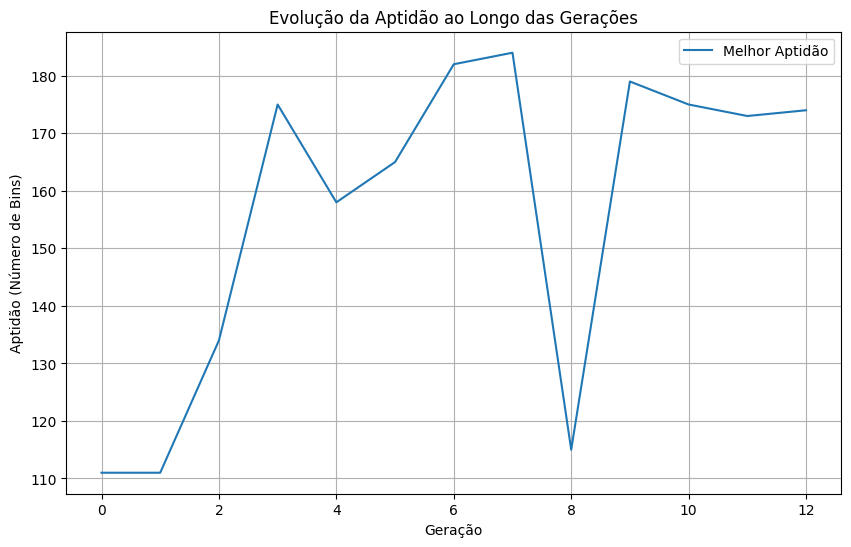

global_solution 111


In [566]:
# Parâmetros do Algoritmo Genético
num_geracoes = 13
tamanho_populacao = 10
prob_crossover = 0.9
prob_mutacao = 0.7
prob_inversao = 0.9

# tracking da evolução do algoritmo
historico_melhor_aptidao = []
historico_aptidao_media = []
historico_pior_aptidao = []

# Função de Avaliação da Aptidão
def avaliar_aptidao(individuo):
    # O objetivo é minimizar o número de bins usadas
    return len(individuo)

# Inicialização da População
def inicializar_populacao(tamanho_populacao, objetos, capacidade_bin):
    populacao = []
    for _ in range(tamanho_populacao):
        individuo = gerar_individuo(objetos, capacidade_bin)
        populacao.append(individuo)
    return populacao

# Função de Seleção por Torneio
def selecao_torneio(populacao, tamanho_torneio=3):
    melhor = None
    for _ in range(tamanho_torneio):
        individuo = random.choice(populacao)
        if (melhor is None) or (avaliar_aptidao(individuo) < avaliar_aptidao(melhor)):
            melhor = individuo
    return melhor

# Loop Principal do Algoritmo Genético
populacao = inicializar_populacao(tamanho_populacao, objetos, capacidade_bin)

global_solution = gerar_individuo(objetos, capacidade_bin)

for geracao in range(num_geracoes):

    nova_populacao = []

    aptidoes = [avaliar_aptidao(individuo) for individuo in populacao]
    # Coletar dados para plotagem
    melhor_aptidao = min(aptidoes)
    
    historico_melhor_aptidao.append(melhor_aptidao)
    
    while len(nova_populacao) < tamanho_populacao:
        # Seleção dos Pais
        pai1 = selecao_torneio(populacao)
        pai2 = selecao_torneio(populacao)
        
        # Aplicação do Cruzamento
        if random.random() < prob_crossover:
            filho = crossover(pai1, pai2, capacidade_bin)
        else:
            filho = pai1.copy()
        
        # Aplicação da Mutação
        if random.random() < prob_mutacao:
            filho = mutacao(filho, capacidade_bin)
        
        # Aplicação da Inversão
        if random.random() < prob_inversao:
            filho = inversao(filho)
        
        nova_populacao.append(filho)
    
    # Atualização da População
    populacao = nova_populacao
    
    # Opcional: Imprimir informações da geração atual
    melhor_individuo = min(populacao, key=avaliar_aptidao)
    
    if(avaliar_aptidao(global_solution) > avaliar_aptidao(melhor_individuo)):
        global_solution = melhor_individuo
    
    print(f"Geração {geracao + 1}: Melhor Aptidão = {avaliar_aptidao(melhor_individuo)}")

# Plotando a evolução das aptidões
plt.figure(figsize=(10, 6))
plt.plot(historico_melhor_aptidao, label='Melhor Aptidão')
plt.xlabel('Geração')
plt.ylabel('Aptidão (Número de Bins)')
plt.title('Evolução da Aptidão ao Longo das Gerações')
plt.legend()
plt.grid(True)
plt.show()

print(f"global_solution {avaliar_aptidao(global_solution)}")


In [567]:
# Resultado Final
global_solution = min(populacao, key=avaliar_aptidao)
print("\nMelhor Solução Encontrada:")
# print("Bins:", global_solution)
print("Número de Bins Utilizadas:", avaliar_aptidao(global_solution))


Melhor Solução Encontrada:
Número de Bins Utilizadas: 189
